In [1]:
import pandas as pd
import json
from glob import glob
import os.path as osp
import datetime
import wordcloud
from io import StringIO
import stop_words
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_colwidth', 255)

In [3]:
subjects = []
for media in ['France 2', 'TF1']:
    for year in ['2021']:
        for month in ['8']:
            month_path = f'../data-news-json/media={media}/year={year}/month={month}'
            day_files = glob(f'{month_path}/day=*/*.json')
            for day_file in day_files:
                for line in open(day_file):
                    subject = json.loads(line)
                    subject['media'] = media.lower().replace(' ', '')
                    subjects.append(subject)

In [4]:
data = pd.DataFrame(subjects)

In [19]:
data[['media', 'date', 'title', 'description']].head()

,media,date,title,description
0,france2,2021-08-01T22:00:00.000Z,États-Unis : le Colorado frappé par une sécheresse historique,"Aux États-Unis, le Colorado est frappé par une terrible sécheresse. Elle menace la production hydro-électrique, l’agriculture et certaines industries. Une bande blanche est visible sur le fleuve, comme pour témoigner des 43 mètres perdus en 20 ans par..."
1,france2,2021-08-01T22:00:00.000Z,"Chine : Li Xiaoshuang, la fabrique des futurs champions de gymnastique","Sous les drapeaux chinois et olympiques, des gymnastes en herbe s'entraînent tous les jours sans relâche aux anneaux, barres parallèles et poutres. Agés de 4 à 8 ans, ils ont intégré une des meilleures écoles du pays : Li Xiaoshuang, une usine à champ..."
2,france2,2021-08-01T22:00:00.000Z,Sécurité routière : la mesure de limitation à 30km/h dans les agglomérations est-elle efficace ?,"Depuis cinq ans, pour ne pas se faire flasher, les Grenoblois (Isère) doivent lever le pied : la vitesse est limitée à 30km/h sur 80% des routes de la métropole. La mesure est inégalement respectée. ""On voit des panneaux partout, mais ça ne se voit pa..."
3,france2,2021-08-01T22:00:00.000Z,"Mal-logement : à Marseille, 60 personnes vivent dans des conteneurs insalubres","Au beau milieu d'un résidence de Marseille (Bouches-du-Rhône), 70 conteneurs sont empilés les uns sur les autres. Habituellement réservés aux marchandises, ils servent ici de logements. Un endroit insalubre que Sami Sida, un agent de sécurité, occupe ..."
4,france2,2021-08-01T22:00:00.000Z,"JO 2021 : de retour de Tokyo, les médaillés olympiques français accueillis en héros à Paris","De retour après les Jeux olympiques de Tokyo. Trentre-quatre athlètes, tout juste revenus en France, étaient réunis lundi 2 août au village olympique, place du Trocadéro, à Paris, où ils ont été accueillis comme de véritables héros par le public. La f..."


In [22]:
data[['media', 'date', 'title', 'description']][['messi' in x.lower() for x in data.description]]

,media,date,title,description
14,france2,2021-08-10T22:00:00.000Z,PSG : les supporters en folie depuis l'arrivée de Lionel Messi,"Lionel Messi est la nouvelle superstar du Paris-Saint-Germain. Son arrivée a fait la Une dans le monde entier. 200 000 personnes ont suivi en temps réel sur internet l'arrivée de son jet privé à Paris, mardi 10 août. Sa popularité bat des records. L'A..."
21,france2,2021-08-10T22:00:00.000Z,"""J'ai très envie de soulever à nouveau la Coupe d'Europe"", affirme Lionel Messi après son arrivée au PSG, dans un entretien au ""20 Heures"" de France 2","""Je ferai tout mon possible pour aider le club à atteindre ses objectifs."" Le footballeur Lionel Messi s'est confié mercredi 11 août à France Télévisions, dans un entretien diffusé au journal de 20 heures de France 2. Le joueur argentin, qui est arriv..."
250,france2,2021-08-28T22:00:00.000Z,Football : Messi fait ses débuts à Reims avec le PSG,"Il a fait une apparition furtive de quelques secondes, mais elles ont suffi pour mettre une centaine de supporters en émoi. Lionel Messi était bien là, et certains feraient tout pour l'apercevoir. Depuis le matin du dimanche 29 août, les caméras du mo..."
322,france2,2021-08-09T22:00:00.000Z,Football : Lionel Messi prêt à s’engager avec le PSG ?,Ils étaient nombreux à s’être déplacés pour apercevoir celui qui pourrait être la nouvelle recrue star du Paris Saint-Germain. Lionel Messi a atterri dans l’après-midi du mardi 10 août à l’aéroport Paris-Le Bourget. Vêtu d’un t-shirt à l’honneur de Pa...
349,tf1,2021-08-10T22:00:00.000Z,Insolite : une nuit avec les bêtes sauvages,"L'essentiel Passer une nuit au milieu des animaux star du Grand Nord américain mais sans quitter la France, c'est désormais possible. Le zoo de Thoiry propose aux familles de dormir au plus près des loups ou des ours, pour mieux les observer. Ours ma..."
559,tf1,2021-08-09T22:00:00.000Z,Messi à Paris : c'est de la folie !,"L'essentiel Lionel Messi est bien à Paris et il a pu mesurer d'ores et déjà l'ampleur de sa popularité. Dès l'aéroport, les fans n'ont pas été déçus. Ils ont pu voir la superstar venue signer le contrat de tous les records. Et enfin, il est apparu. A..."


In [26]:
data[['media', 'date', 'title', 'description']][['climat' in x.lower() for x in data.description]]

,media,date,title,description
9,france2,2021-08-10T22:00:00.000Z,Catastrophes climatiques : vers une hausse des tarifs des assurances ?,"Depuis le début de l’été, le sud de l’Europe, la Turquie et la Californie font face à des incendies dévastateurs. En Allemagne, des milliers de maisons ont été submergées par les inondations. Ces catastrophes naturelles se répètent inlassablement et c..."
30,france2,2021-08-11T22:00:00.000Z,Climat : des vagues de chaleur plus intenses et plus fréquentes au fil des années,"À Aix-en-Provence, dans les Bouches-du-Rhône, la température est montée très haut, jeudi 12 août. La canicule commence à s'installer, avec 39°C. L'Espagne attend jusqu'à 45°C ces prochains jours, et l'Italie, en proie à une canicule exceptionnelle, a ..."
44,france2,2021-08-12T22:00:00.000Z,"Photo hebdo : Intempéries, incendies ou encore vague de chaleur pour une spéciale climat","En Turquie, les immeubles ont plié sous la fureur du torrent. Plusieurs heures de pluie ont provoqué des glissements de terrain, il est impossible pour l'homme de s'opposer à la nature. Dans la commune de Greenville, en Californie (États-Unis), une bi..."
72,france2,2021-08-15T22:00:00.000Z,Apiculture : vers une production de miel très réduite,"Entre deux averses, des apiculteurs auvergnats inspectent leurs ruches. Les abeilles sont affamées, elles ne sont pas sorties butiner, la faute au manque d'éclaircies ces derniers mois. Ils doivent donc les nourrir avec un sirop, ce qui est exceptionn..."
119,france2,2021-08-18T22:00:00.000Z,Var : l’un des plus importants incendies des 20 dernières années,"C’est l’un des plus grands incendies de ces 20 dernières années. 7 100 hectares ont été ravagés par les flammes, et deux personnes sont décédées dans le Var. Dans le massif des Maures, le brasier s’est étendu sur plus de 20 kilomètres. De Gonfaron, pr..."
143,france2,2021-08-02T22:00:00.000Z,Grèce : une canicule jamais vue depuis 1987,"De violents incendies ravagent les environs d'Athènes, en Grèce. Une cinquantaine de feux de forêt se sont déclenchés en 24 heures à cause d'un épisode caniculaire sans précédent. ""Il fait encore 40°C ce soir et la température ne risque pas de baisser..."
160,france2,2021-08-21T22:00:00.000Z,Réchauffement climatique : la Mer de Glace va-t-elle disparaître ?,"C'est une fine lande de glace qui ressemble à un désert de pierre. La Mer de Glace, le plus grand glacier français, fond à vue d'œil. Entre juin et octobre 2020, il a perdu 8 mètres de hauteur. Le gris domine de plus en plus. Depuis 35 ans, Luc Moreau..."
166,france2,2021-08-21T22:00:00.000Z,Environnement : comment se régénère la nature après un incendie ?,"Quatre ans après l'incendie qui a frappé le Cap Lardier (Var), la nature reprend ses droits sur les 500 hectares dévorés par les flammes. En effet, le 24 juillet 2017, des flammes immenses dévoraient les paysages paradisiaques du Cap Taillat et du Cap..."
272,france2,2021-08-03T22:00:00.000Z,"Retour sur Chandigarh, la ville idéale pensée par Le Corbusier en Inde","Chandigarh détonne : sortie de terre dans les années 1950 pour devenir la capitale du Penjab indien, cette oasis de végétation et de béton a été conçue de toutes pièces par l'architecte français Le Corbusier. En 1953, six ans après son indépendance, l..."
294,france2,2021-08-04T22:00:00.000Z,Sao Tomé-et-Principe : un archipel à la nature sauvage et préservée,"L'archipel de Sao Tomé-et-Principe est un ensemble de trois îles perdues dans l'océan Atlantique. Sur ces terres qui allient roches volcaniques et forêts vierges, cascades et pics rocheux, la nature est restée à l'état sauvage. Ce jour-là, un groupe d..."


In [14]:
import re
if focus_media == 'tf1':
    topic_pattern = re.compile("https://www.tf1info.fr/(\S+)/(\S+).html")
    last_week['topic'] = [topic_pattern.match(u).group(1) for u in last_week.url]

In [15]:
if focus_media == 'france2':
    topic_pattern = re.compile("https://www.francetvinfo.fr/(\S+)/(\S+).html")
    last_week['topic'] = [topic_pattern.match(u).group(1).split('/')[0] for u in last_week.url]

NameError: name 'last_week' is not defined

In [16]:
last_week['topic'].value_counts().plot(kind='barh').invert_yaxis()

NameError: name 'last_week' is not defined

In [40]:
last_week[last_week.topic == "monde"]

,title,description,date,order,presenter,authors,editor,editorDeputy,url,urlTvNews,containsWordGlobalWarming,media,topic
338,Guerre en Ukraine : les troupes russes aux portes de Kiev,"Pour sortir de Kiev, capitale de l'Ukraine, il faut traverser un nombre incalculable de barrages tenus par des civils armés. Au bout de 30 km, les journalistes de France Télévisions arrivent à Irpin (Ukraine). L'entrée de la ville est tenue par des ha...",2022-02-28T00:00:00.000Z,1,Anne-Sophie Lapix,"[M.De Chalvron, F.Le Moal, C.Kenck, A.Demchuk, P.Miette]",Elsa Pallot,"[Sébastien Renout, Anne Poncinet, Arnaud Comte]",https://www.francetvinfo.fr/monde/europe/manifestations-en-ukraine/guerre-en-ukraine-les-troupes-russes-aux-portes-de-kiev_4986543.html,https://www.francetvinfo.fr/replay-jt/france-2/20-heures/jt-de-20h-du-lundi-28-fevrier-2022_4951056.html,False,france2,monde
339,Guerre en Ukraine : les habitants de Kiev s'organisent,"Lundi 28 février au soir, Kiev (Ukraine) est à nouveau sous les bombes, après une journée d’alertes répétées. Dès le matin, les habitants ont pu à nouveau sortir dans les rues après près de 48 heures de couvre-feu. Ils ne peuvent que constater les dég...",2022-02-28T00:00:00.000Z,2,Anne-Sophie Lapix,"[B.Delombre, D.Olliéric, B.Vignais C.Kenck, L.Feuillebois]",Elsa Pallot,"[Sébastien Renout, Anne Poncinet, Arnaud Comte]",https://www.francetvinfo.fr/monde/europe/manifestations-en-ukraine/guerre-en-ukraine-les-habitants-de-kiev-s-organisent_4986606.html,https://www.francetvinfo.fr/replay-jt/france-2/20-heures/jt-de-20h-du-lundi-28-fevrier-2022_4951056.html,False,france2,monde
340,"Guerre en Ukraine : à Kiev, les bombardements ont repris","""Depuis la tombée de la nuit, les bombardements ont repris. Les sirènes n'arrêtent pas de retentir, comme en ce moment, et tout à l'heure un missile est tombé. J'ai senti pour la première fois les murs de l'hôtel bouger"", rapporte Dorothée Olliéric, e...",2022-02-28T00:00:00.000Z,3,Anne-Sophie Lapix,[D. Olliéric],Elsa Pallot,"[Sébastien Renout, Anne Poncinet, Arnaud Comte]",https://www.francetvinfo.fr/monde/europe/manifestations-en-ukraine/guerre-en-ukraine-a-kiev-les-bombardements-ontrepris_4986621.html,https://www.francetvinfo.fr/replay-jt/france-2/20-heures/jt-de-20h-du-lundi-28-fevrier-2022_4951056.html,False,france2,monde
341,Guerre en Ukraine : les bombardements s’intensifient,"Lundi 28 février, à Kharkiv (Ukraine), deuxième ville du pays, les bombardements sont intenses. Le cinquième jour de conflit a été le théâtre de frappes sur un centre commercial, des immeubles et des quartiers résidentiels en pleine journée. Dans une ...",2022-02-28T00:00:00.000Z,4,Anne-Sophie Lapix,"[A.-C.Poignard, E.Noel, @RevelateursFTV]",Elsa Pallot,"[Sébastien Renout, Anne Poncinet, Arnaud Comte]",https://www.francetvinfo.fr/monde/europe/manifestations-en-ukraine/guerre-en-ukraine-les-bombardements-sintensifient_4986636.html,https://www.francetvinfo.fr/replay-jt/france-2/20-heures/jt-de-20h-du-lundi-28-fevrier-2022_4951056.html,False,france2,monde
342,Guerre en Ukraine : des négociations ont débuté entre russes et Occidentaux,"Ils sont arrivés en avion militaire au cinquième jour de la guerre. Lundi 28 février, une première rencontre entre Ukrainiens et Russes s’est déroulée sous haute sécurité. A la table des négociations, les présidents Zelensky et Poutine sont absents : ...",2022-02-28T00:00:00.000Z,5,Anne-Sophie Lapix,[T.Cuny],Elsa Pallot,"[Sébastien Renout, Anne Poncinet, Arnaud Comte]",https://www.francetvinfo.fr/monde/europe/manifestations-en-ukraine/guerre-en-ukraine-des-negociations-ont-debute-entre-russes-et-occidentaux_4986639.html,https://www.francetvinfo.fr/replay-jt/france-2/20-heures/jt-de-20h-du-lundi-28-fevrier-2022_4951056.html,False,france2,monde
343,Guerre en Ukraine : les sanctions économiques font leurs premiers effets en Russie,"A Moscou, les files d'attente s'allongent devant les distributeurs de billets. Un signe des premiers effets des sanctions prises contre Vladimir Poutine

In [20]:
text = "\n".join([str(x) for x in last_week['title']])

In [21]:
text[:100]

'REPORTAGE - À Kiev, aux côtés des milices de volontaires entrés en résistance\nCovid-19 : ces lieux o'

In [230]:
stop_words_fr=stop_words.get_stop_words('fr') + ['enquête', 'plus', 'france', 'français', 'va', 'or']

In [251]:
cv = CountVectorizer(stop_words=stop_words_fr, min_df=2, max_df=.2)

In [252]:
X = cv.fit_transform(last_week['title'])

In [253]:
X.shape

(47, 21)

In [254]:
wid2word = {wid:word for word,wid in cv.vocabulary_.items()}

In [255]:
frequencies = {wid2word[w]:f for w,f in enumerate(X.sum(axis=0).tolist()[0])}

In [256]:
colors = sns.color_palette('Blues_r', len(frequencies))
word_color = {w[0]:colors[k] for k,w in enumerate(sorted(frequencies.items(), key=lambda x: -x[1]))}
def freq_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple([int(x * 255) for x in word_color[word]] + [1])

In [257]:
wc = wordcloud.WordCloud(background_color='white', width=400, height=400, prefer_horizontal=1, color_func=freq_color_func, relative_scaling=True)

In [258]:
wc.generate_from_frequencies(frequencies)

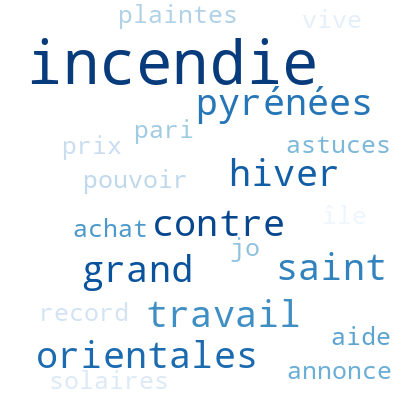

In [259]:
wc.to_image()

In [41]:
subject = "giec"

In [42]:
last_week[[subject in t.lower() or subject in d.lower() for t,d in zip(last_week.title, last_week.description)]][['media', 'date', 'title', 'description', 'url']]

,media,date,title,description,url
